# Tasca M6 T01

### Descripció: Exercicis per practicar amb regressions.

### - **Exercici 1**
**Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.** 

Primer carguem el arxiu en format de dataframe i adjudiquem les columnes:

In [1]:
import pandas as pd
data = pd.read_csv("C:/Users/julia/DATA SCIENCE IT/SPRINT 5/T2/housing data.csv", sep=",")
data.columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
5,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
6,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
7,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
8,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9
9,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,15.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [3]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,505.0,3.620667,8.608572,0.00906,0.08221,0.25915,3.67822,88.9762
ZN,505.0,11.350495,23.343704,0.00000,0.00000,0.00000,12.50000,100.0000
INDUS,505.0,11.154257,6.855868,0.46000,5.19000,9.69000,18.10000,27.7400
CHAS,505.0,0.069307,0.254227,0.00000,0.00000,0.00000,0.00000,1.0000
NOX,505.0,0.554728,0.115990,0.38500,0.44900,0.53800,0.62400,0.8710
RM,505.0,6.284059,0.703195,3.56100,5.88500,6.20800,6.62500,8.7800
AGE,505.0,68.581584,28.176371,2.90000,45.00000,77.70000,94.10000,100.0000
DIS,505.0,3.794459,2.107757,1.12960,2.10000,3.19920,5.21190,12.1265
RAD,505.0,9.566337,8.707553,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,505.0,408.459406,168.629992,187.00000,279.00000,330.00000,666.00000,711.0000


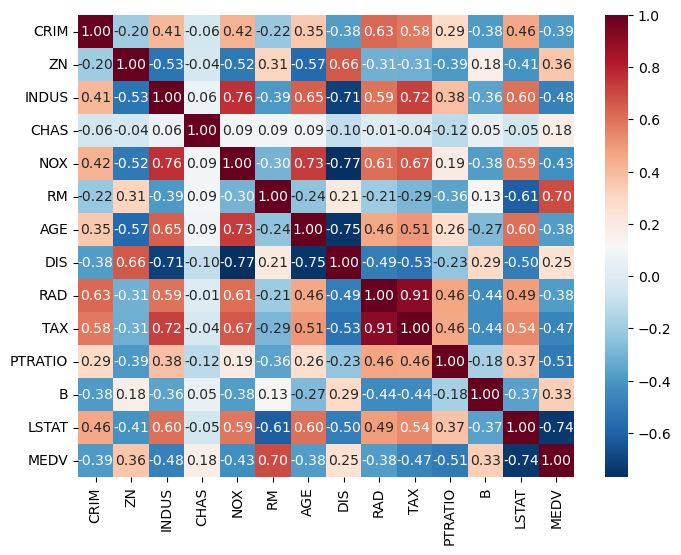

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(),annot=True,fmt=".2f",cmap='RdBu_r')
plt.show()

La figura superior, és un mapa de calor de la matriu de correlació de les nostres dades. Cada cel·la de la matriu conté el coeficient de correlació. El coeficient pot variar entre -1 i 1: un valor proper a 1 indica una correlació positiva, prop a -1 una correlació negativa i prop a 0 una correlació feble o inexistenta. Els colors també indiquen el grau de correlació, el color blau representa correlacions inversament proporcionals (negatives) i els vermells indiquen una relació directament proporcional (positiva).

Els resultats mostren que el coeficient de correlació entre RAD i TAX es de 0.91, indicant que hi ha una correlació molt gran entre els impostos a la propietat i l'index d'accessibilitat  a carreteres radials. Es tracta d'una correlació directament proporcional(color vermell). Mentre que, entre les variables "MEDV" i "LSTAT" hi ha una correlació inversament proporcional.

L'objectiu principal d'aquest anàlisis és predir el valor mitjà de les cases (MEDV). Per fer-ho, utilitzaré dos models de regressió que prendran en consideració les altres variables per tal de fer aquesta predicció.

Segueixo els pasos de la tasca M5 T02, aplicant  RobusScaler, MinMaxScaler i convertir RAD en categorica per transformar les dades:

In [6]:
from sklearn import preprocessing 
data[["CRIM", "ZN", "RM", "DIS", "B", "LSTAT"]]=preprocessing.RobustScaler().fit_transform(data[["CRIM", "ZN", "RM", "DIS", "B", "LSTAT"]])

In [7]:
dummies = pd.get_dummies(data["RAD"], prefix="RAD")
data = pd.concat([data, dummies], axis=1)
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.064471,0.0,7.07,0,0.469,0.287838,78.9,0.568110,2,242.0,...,21.6,0,1,0,0,0,0,0,0,0
1,-0.064477,0.0,7.07,0,0.469,1.320270,61.1,0.568110,2,242.0,...,34.7,0,1,0,0,0,0,0,0,0
2,-0.063064,0.0,2.18,0,0.458,1.067568,45.8,0.920017,3,222.0,...,33.4,0,0,1,0,0,0,0,0,0
3,-0.052864,0.0,2.18,0,0.458,1.268919,54.2,0.920017,3,222.0,...,36.2,0,0,1,0,0,0,0,0,0
4,-0.063765,0.0,2.18,0,0.458,0.300000,58.7,0.920017,3,222.0,...,28.7,0,0,1,0,0,0,0,0,0
5,-0.047514,1.0,7.87,0,0.524,-0.264865,66.6,0.758797,5,311.0,...,22.9,0,0,0,0,1,0,0,0,0
6,-0.031869,1.0,7.87,0,0.524,-0.048649,96.1,0.884122,5,311.0,...,27.1,0,0,0,0,1,0,0,0,0
7,-0.013323,1.0,7.87,0,0.524,-0.779730,100.0,0.926412,5,311.0,...,16.5,0,0,0,0,1,0,0,0,0
8,-0.024780,1.0,7.87,0,0.524,-0.275676,85.9,1.090299,5,311.0,...,18.9,0,0,0,0,1,0,0,0,0
9,-0.009527,1.0,7.87,0,0.524,0.228378,94.3,1.011440,5,311.0,...,15.0,0,0,0,0,1,0,0,0,0


In [8]:
data[["INDUS","NOX","AGE","RAD","TAX"]]=preprocessing.MinMaxScaler().fit_transform(data[["INDUS","NOX","AGE","RAD","TAX"]])

Un cop transformades, procedeixo a fer el Train-Test Split. La variable independent x seràn totes les columnes menys MEDV i la variable dependent y serà el target MEDV.

In [9]:
# Divideixo el conjunt de dades en un conjunt de training y test
from sklearn.model_selection import train_test_split
X = data.drop('MEDV', axis=1)
y = data['MEDV']
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 22) (101, 22) (404,) (101,)


Com s'indica, hi ha 404 registres dins del training set (80%) i 101 registres dins del test set (20%), tal i com s'ha especificat a la funció.

### **Utilitzaré dos models de regressió per predir el preu de les vivendes (MEDV): Regressió lineal i Random Forest**

In [10]:
from sklearn.linear_model import LinearRegression
#Creo un model de regressió de Regressio lineal
RL = LinearRegression()
#entreno el model
RL.fit(X_train, y_train)
#faig les prediccions del conjunt de proba (x_test)
lr_y_test_pred = RL.predict(X_test)


In [11]:
from sklearn.metrics import r2_score
r2_rl = r2_score(y_test, lr_y_test_pred)
print('El coeficient de determinació és:', r2_rl)

El coeficient de determinació és: 0.6445039284268628


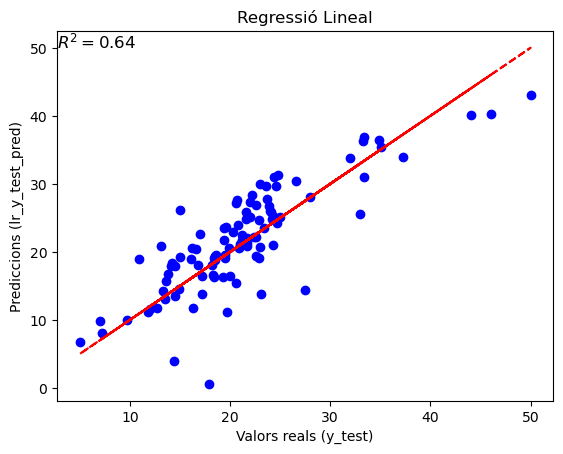

In [12]:
import matplotlib.pyplot as plt

plt.scatter(y_test, lr_y_test_pred, color='Blue')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Valors reals (y_test)')
plt.ylabel('Prediccions (lr_y_test_pred)')
plt.title('Regressió Lineal')

plt.text(plt.xlim()[0], plt.ylim()[1], f'$R^2={r2_rl:.2f}$', fontsize=12, verticalalignment='top', horizontalalignment='left')

plt.show()

In [13]:
from sklearn.ensemble import RandomForestRegressor
#Creo un model de regressió de Random Forest
RF = RandomForestRegressor()
#Entreno el model
RF.fit(X_train, y_train)
#Faig les prediccions al conjunt proba (x_test)
rf_y_test_pred = RF.predict(X_test)

In [14]:
from sklearn.metrics import r2_score
r2_rf = r2_score(y_test, rf_y_test_pred)
print('El coeficient de determinació de RANDOM FOREST és:', r2_rf)

El coeficient de determinació de RANDOM FOREST és: 0.8667631287435675


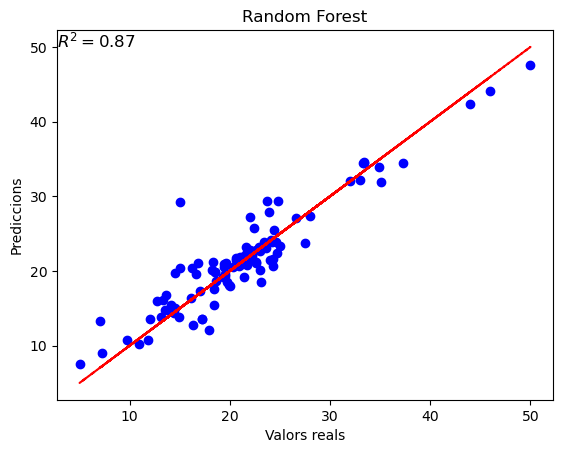

In [15]:
import matplotlib.pyplot as plt

plt.scatter(y_test, rf_y_test_pred, color='Blue')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Valors reals')
plt.ylabel('Prediccions')
plt.title('Random Forest')
plt.text(plt.xlim()[0], plt.ylim()[1], f'$R^2={r2_rf:.2f}$', fontsize=12, verticalalignment='top', horizontalalignment='left')

plt.show()

Dels dos models utilitzats, Random Forest sembla ser el model que millor prediu el preu de les vivendes (MEDV), ja que les predicions (punts blaus) s'acosten mes a la linia de regressió (vermella). Aquesta linia de referencia representa la situació ideal on les prediccions serien iguals als valors reals (y_test). Només cal comparar els coeficients de determinació, on en el Random forest es troba a 0.86 i el de regressió lineal a 0.64.



### - **Exercici 2**
**Compara’ls en base al MSE i al R2.**

En l'exercici anterior ja els he comparat en base a R2, el coeficient de determinació, ara en aquest el compararé en base al MSE (Mean Squared Error):

In [16]:
from sklearn.metrics import mean_squared_error

mse_regressio_lineal = mean_squared_error(y_test, lr_y_test_pred)
mse_random_forest = mean_squared_error(y_test, rf_y_test_pred)

print(f'MSE Regressió Lineal: ' , mse_regressio_lineal)
print(f'MSE Random Forest: ', mse_random_forest )


MSE Regressió Lineal:  19.809007789123207
MSE Random Forest:  7.424245811881183


Torno a calcular els coeficients de determinació, per també comparar-los en aquest exercici:

In [17]:
print('El coeficient de determinació de RANDOM FOREST és:', r2_rf)

El coeficient de determinació de RANDOM FOREST és: 0.8667631287435675


In [18]:
print('El coeficient de determinació de Linear Regression és:', r2_rl)

El coeficient de determinació de Linear Regression és: 0.6445039284268628


Creo una taula perque sigui més fàcil analitzar els resultats:

In [19]:
df = pd.DataFrame(data = [["Regressió Lineal",  r2_rl, mse_regressio_lineal],["RandomForest", r2_rf, mse_random_forest]],
                  columns = ["Model","R2","MSE"])
df["R2"] = df["R2"].round(2)
df["MSE"] = df["MSE"].round(2)

In [20]:
df

,Model,R2,MSE
0,Regressió Lineal,0.64,19.81
1,RandomForest,0.87,7.42


Amb la taula podem veure com el model de random forest obté una millor predició ja que el coeficient de determinació és més elevat que no pas amb el model de regressió lineal. Els resultats de la predició també es veuen reflectats en el MSE on en el model de regressio lineal adopta un valor molt més elevat indicant més diferencies entre els valors reals i la predició. Mentre que el MSE de Random Forest obté un valor mes baix indicant un millor ajust a les dades reals del model.

### - **Exercici 3**
**Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.**
Primer miro els valors per defecte que tenen els parametres dels models:
- RANDOM FOREST

In [21]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [22]:
from sklearn.model_selection import GridSearchCV

#primer creo un diccionari per definir els hiperparametres a ajustar:

parametres = {'n_estimators': [50, 100, 150],  
        'criterion': ['poisson', 'squared_error', 'absolute_error', 'friedman_mse']} 
parametres

{'n_estimators': [50, 100, 150],
 'criterion': ['poisson', 'squared_error', 'absolute_error', 'friedman_mse']}

In [23]:
#Confirguro el Grid Search amb el model Random Forest i els parametres seleccionats              
GS_RF = GridSearchCV(RF, parametres) 
#Busqueda en quadricula utilitzant com a dades X i y per seleccionar la millor combinació de paràmetres
GS_RF.fit(X.values, y.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['poisson', 'squared_error',
                                       'absolute_error', 'friedman_mse'],
                         'n_estimators': [50, 100, 150]})

In [24]:
#Quins son els millors hiperparàmetres
print("Millors hiperparàmetres:", GS_RF.best_params_)

Millors hiperparàmetres: {'criterion': 'absolute_error', 'n_estimators': 50}


La millor configuració per el meu model de Random forest utilitza 'absolute_error' com a criteri i consta de 50 estimadors (n_estimators)

In [25]:
#model Random forest amb millor combinació d'hiperparametres:
RF_best_model = GS_RF.best_estimator_

Un cop tinc la millor configuració per al model Random Forest, procedeixo a fer una predició del X test utilitzant el model i i comparant-lo amb el y_test:

In [26]:
#Prediccions del conjunt proba (x_test) UTILITZANT EL NOU MODEL MILLORAT
RF_bestmodel_y_test_pred = RF_best_model.predict(X_test)

C:\Users\julia\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [27]:
# comparem la predició feta pel nou model amb el y_test
r2_RF_bestmodel = r2_score(y_test, RF_bestmodel_y_test_pred)
print('El coeficient de determinació de RANDOM FOREST és:', r2_RF_bestmodel)

El coeficient de determinació de RANDOM FOREST és: 0.981815054956028


Com es pot veure, el coeficient de determinació amb el nou model ha pasat de 0.86 a 0.99, una millora considerable!

**Faig el mateix amb linear regression**

In [28]:
RL.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [29]:
RL_parametres = {'fit_intercept': [True, False]}


In [30]:
#Confirguro el Grid Search amb el model Linear Regression i els parametres seleccionats              
GS_RL = GridSearchCV(RL, RL_parametres)

In [31]:
#Busqueda en quadricula utilitzant com a dades X i y per seleccionar la millor combinació de paràmetres
GS_RL.fit(X.values, y.values.ravel())

GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [32]:
#Quins son els millors hiperparàmetres
print("Millors hiperparàmetres de Linear Regression:", GS_RL.best_params_)

Millors hiperparàmetres de Linear Regression: {'fit_intercept': False}


In [33]:
RL_best_model = GS_RL.best_estimator_

Per al model de regressió lineal la millor configuració pel parametre 'fit_intercept' es 'False'. Significa que el model funciona millor sense la intersecció ('fit_intercept').

Un cop tenim la millor configuració per al model de regressio lineal procedeixo a fer una predició del X test amb el nou model millorat i compararlo amb el y_test:

In [34]:
#Prediccions del conjunt proba (x_test) UTILITZANT EL NOU MODEL MILLORAT
RL_bestmodel_y_test_pred = RL_best_model.predict(X_test)

C:\Users\julia\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [35]:
# comparem la predició feta pel nou model amb el y_test
r2_RL_bestmodel = r2_score(y_test, RL_bestmodel_y_test_pred)
print('El coeficient de determinació de Linear Regression és:', r2_RL_bestmodel)

El coeficient de determinació de Linear Regression és: 0.6877643092870837


Hem passat de 0.64 a  0.69 amb el nou model, per tant podriem confirmar que si, que el nou model de regressio també dona millors resultats.

Per veure-ho millor i en una taula:


In [36]:
#calculem també el MSE
mse_regressio_lineal_bestmodel = mean_squared_error(y_test, RL_bestmodel_y_test_pred)
mse_random_forest_bestmodel = mean_squared_error(y_test, RF_bestmodel_y_test_pred)


In [37]:
df1 = pd.DataFrame(data = [["Best Model Regressió Lineal",  r2_RL_bestmodel, mse_regressio_lineal_bestmodel],["Regressió Lineal",  r2_rl, mse_regressio_lineal],["Best Model RandomForest",  r2_RF_bestmodel, mse_random_forest_bestmodel],["RandomForest", r2_rf, mse_random_forest]],
                  columns = ["Model","R2","MSE"])
df1["R2"] = df1["R2"].round(2)
df1["MSE"] = df1["MSE"].round(2)

df1.T

,0,1,2,3
Model,Best Model Regressió Lineal,Regressió Lineal,Best Model RandomForest,RandomForest
R2,0.69,0.64,0.98,0.87
MSE,17.4,19.81,1.01,7.42


Amb la taula podem veure, com en la regressio lienal s'ha millorat el coeficient de determinació i també el MSE. I com en el random forest s'ha millorat moltisim el coeficient de determinació i el MSE ha baixat drasticament, indicant que el nou model de random forest ens dona resultats molt prometedors.

### - **Exercici 4**
**Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).**

El Grid Search s'aplica per trobar els millors hiperparàmetres, i la cross validation s'utilitza per evaluar el rendimient del model amb aquests hiperparàmetres en múltiples conjunts de dades.

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
Cross_Val_RF_GS = cross_val_score(RF_best_model, X.values, y.values.ravel())
Cross_Val_RF_GS

array([0.77060086, 0.86715011, 0.7946495 , 0.42741038, 0.25791863])

Per defecte, el cross_val_score ens retorna el coeficient de determinació dels 5 folds. Un valor més a prop de 1 indica un millor rendiment del model.
Cada valor final, correspon a cadascun dels 5 'folds'.
Les nostres puntuacions ens indiquen que el model té un bon rendiment en els dos primers "folds", però el seu rendiment disminueix en els següents tres "folds". 

In [40]:
print(round(Cross_Val_RF_GS.mean(),3))

0.624


Aquesta seria la mitja del coeficient de determinació de tots els 'folds' del nostre model MILLORAT de random forest. Amb la cross validation estem avaluant el rendiment del model utilitzant totes les dades del nostre dataset (X.values i y.values). El valor final és de 0.63, un valor prou bo per al tipus d'estudi que s'esta fent.

**Ara fem el mateix al model de regressio lineal:**


In [41]:
Cross_Val_RL_GS = cross_val_score(RL_best_model,X.values, y.values.ravel())
Cross_Val_RL_GS

array([ 0.61744952,  0.73871671,  0.55604743,  0.08267432, -0.3536494 ])

Els primers dos folds presenten un major rendiment pero els altres no tant, mirem la mitjana:

In [42]:
print(round(Cross_Val_RL_GS.mean(),3))

0.328


En  aquest cas, aquest model no seria gaire recomenable ja que el valor del coeficient de determinació és molt baix i no es asegura bons resultats.

### - **Exercici 5**
**No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.**

Si mirem la matriu de correlacions, hi ha una forta correlació entre la variable dependent 'MEDV' i 'RM' amb un valor de 0.7. Si eliminem la variable 'RM' del nostre dataset a l'hora de fer prediccions, els resultats del model de predició podrien ser pitjors ja que aquesta variable esta altament correlacionada amb 'MEDV'. Mireu la matriu:

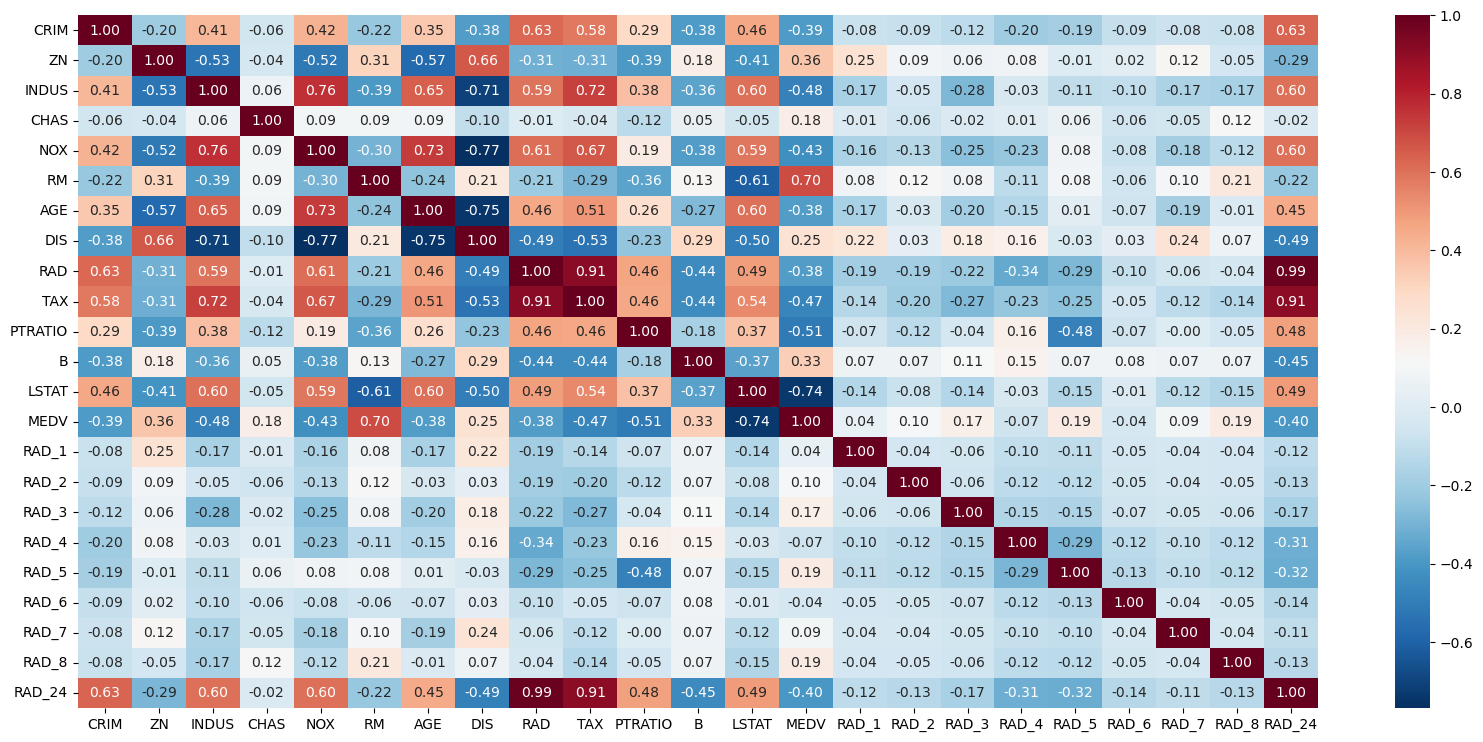

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 9))
sns.heatmap(data.corr(),annot=True,fmt=".2f",cmap='RdBu_r')
plt.show()

In [44]:
#Esborro la columna 'RM' del dataset
data_noRM = data.drop(["RM"], axis=1)

In [45]:
data_noRM.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.064471,0.0,0.242302,0,0.172840,0.782698,0.568110,0.043478,0.104962,17.8,...,21.6,0,1,0,0,0,0,0,0,0
1,-0.064477,0.0,0.242302,0,0.172840,0.599382,0.568110,0.043478,0.104962,17.8,...,34.7,0,1,0,0,0,0,0,0,0
2,-0.063064,0.0,0.063050,0,0.150206,0.441813,0.920017,0.086957,0.066794,18.7,...,33.4,0,0,1,0,0,0,0,0,0
3,-0.052864,0.0,0.063050,0,0.150206,0.528321,0.920017,0.086957,0.066794,18.7,...,36.2,0,0,1,0,0,0,0,0,0
4,-0.063765,0.0,0.063050,0,0.150206,0.574665,0.920017,0.086957,0.066794,18.7,...,28.7,0,0,1,0,0,0,0,0,0


In [46]:
#divideixo les dades en dos conjunts
#conjunt caracteristiques
X2 = data_noRM.drop('MEDV', axis=1)
# conjunt target
y2 = data_noRM['MEDV']
# divideixo els conjunts en train i test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(404, 21) (101, 21) (404,) (101,)


In [47]:
# Entreno el model (RF_best_model) amb les dades conjunt del training set
RF_best_model.fit(X_train2.values, y_train2.values.ravel()) 

RandomForestRegressor(criterion='absolute_error', n_estimators=50)

In [48]:
#Faig prediccions amb el conjunt proba (X_test) amb el model entrenat amb les nostres dades del conjunt train.
RF_y_test_pred2 = RF_best_model.predict(X_test2)

C:\Users\julia\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [49]:
# comparem la predició feta pel nou model amb el conjunt y_test
r2_RF2= r2_score(y_test2, RF_y_test_pred2 )
print('El coeficient de determinació de RANDOM FOREST és:', r2_RF2)

El coeficient de determinació de RANDOM FOREST és: 0.8409412121549473


In [50]:
#calculem el mse 
mse_random_forest_bestmodel2 = mean_squared_error(y_test2, RF_y_test_pred2)

In [52]:
df2 = pd.DataFrame(data = [["Best Model RandomForest amb RM",  r2_RF_bestmodel, mse_random_forest_bestmodel],["Best Model RandomForest sense RM", r2_RF2, mse_random_forest_bestmodel2]],
                  columns = ["Model","R2","MSE"])
df2["R2"] = df1["R2"].round(2)
df2["MSE"] = df1["MSE"].round(2)
df2

,Model,R2,MSE
0,Best Model RandomForest amb RM,0.98,1.01
1,Best Model RandomForest sense RM,0.84,8.86


Com es pot comprovar tot i que el coeficient de determinació 0.84 indica un bon ajust del model, no supera el valor obtingut en les prediccions amb el dataset que si que contenia 'RM'. El MSE puja fins a 8.86, indicant que les predicions s'allunyen mes dels valors reals en comparació amb el model que si que usa les dades 'RM'. 

En conclusió podriem dir que utilitzant els dos datasets (amb o sense RM) obtindriem un bon rendiment del model creat, però esta clar que utilitzant les dades 'RM' les prediccions del model milloren considerablement. 
Esta clar que aquesta variable influeix molt en la predicció de 'MEDV' i això s'explica amb la taula de correlació observant el seu alt valor de correlació.